In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Hyundai_motor_company.csv')

In [3]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
print(data.duplicated().sum())

0


In [5]:
print("Shape of the data:", data.shape)

Shape of the data: (1694, 7)


In [6]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,122268.195312,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,121843.671875,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,118871.851562,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,116749.132812,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,115900.062500,888701
5,2016-01-11,134500.0,140500.0,134000.0,140000.0,118871.851562,542749
6,2016-01-12,140500.0,141500.0,139000.0,139500.0,118447.320312,386506
7,2016-01-13,140500.0,141500.0,139500.0,140500.0,119296.414062,338336
8,2016-01-14,138500.0,143500.0,136500.0,141000.0,119720.937500,664829
9,2016-01-15,141000.0,142000.0,136500.0,138500.0,117598.226562,568653


<AxesSubplot:>

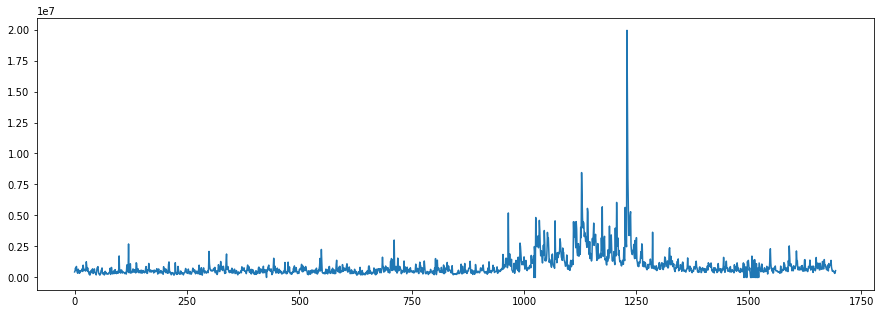

In [7]:
data['Volume'].plot(figsize=(15,5))

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
def adtest(dataset):
    dftest = adfuller(dataset, autolag="AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-VALUES : ", dftest[1])
    print("3. NUM OF LAGS : ", dftest[2])
    print("4. NUM OF OBSERVATIONS USED FOR THE ADF REGRESSION AND CRITICAL VALUES CALCULATION : ", dftest[3])
    print("5. CRITICAL VALUES : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ",val)

In [10]:
adtest(data['Volume'])

1. ADF :  -4.128684089431427
2. P-VALUES :  0.0008680257575225539
3. NUM OF LAGS :  17
4. NUM OF OBSERVATIONS USED FOR THE ADF REGRESSION AND CRITICAL VALUES CALCULATION :  1676
5. CRITICAL VALUES : 
	 1% :  -3.4342577230258966
	 5% :  -2.8632660384888355
	 10% :  -2.5676888997698804


In [11]:
from pmdarima import auto_arima

import warnings 
warnings.filterwarnings("ignore")

In [12]:
hyundai_fit = auto_arima(data['Volume'],trace=True,
                        suppress_warnings=True)
hyundai_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=50259.056, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50652.812, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50522.514, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50384.193, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50650.813, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=50254.338, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=50286.546, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50257.898, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=50239.333, Time=1.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=50274.398, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=50241.140, Time=2.78 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=50275.819, Time=0.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=50270.021, Time=0.63 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.97 sec
 ARIMA(1,1,3)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1694
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -25113.455
Date:                Tue, 29 Nov 2022   AIC                          50236.911
Time:                        10:24:53   BIC                          50264.082
Sample:                             0   HQIC                         50246.972
                               - 1694                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8165      0.027     30.021      0.000       0.763       0.870
ma.L1         -1.2928      0.029    -44.397      0.000      -1.350      -1.236
ma.L2          0.1621      0.018      8.820      0.000       0.126       0.198
ma.L3          0.1447      0.024      5.981      0.000       0.097       0.192
sigma2      4.719e+11   3.58e-13   1.32e+24      0.000    4.72e+11    4.72e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           5557749.66
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              13.59   Skew:                            11.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       282.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.25e+38. Standard errors may be unstable.
"""

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [50]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape, test.shape)

(1694, 7)
(1664, 7) (30, 7)


In [51]:
model = ARIMA(train['Volume'], order=(1,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 1664
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -24681.044
Date:                Tue, 29 Nov 2022   AIC                          49372.088
Time:                        11:24:25   BIC                          49399.170
Sample:                             0   HQIC                         49382.125
                               - 1664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8163      0.028     29.537      0.000       0.762       0.870
ma.L1         -1.2922      0.030    -43.672      0.000      -1.350      -1.234
ma.L2          0.1615      0.019      8.652      0.000       0.125       0.198
ma.L3          0.1447      0.025      5.889      0.000       0.097       0.193
sigma2      4.792e+11    3.6e-13   1.33e+24      0.000    4.79e+11    4.79e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           5324434.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              15.29   Skew:                            11.81
Prob(H) (two-sided):                  0.00   Kurtosis:                       279.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+38. Standard errors may be unstable.
"""

### Make predictions on test data set

In [52]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end = end, typ='levels')
print(pred)
pred.index = data.index[start:end+1]
print(pred)

1664    728999.638887
1665    752284.762778
1666    760897.705649
1667    767928.090333
1668    773666.699025
1669    778350.885053
1670    782174.390004
1671    785295.357025
1672    787842.871745
1673    789922.301360
1674    791619.652698
1675    793005.129537
1676    794136.036277
1677    795059.148104
1678    795812.645642
1679    796427.694137
1680    796929.732475
1681    797339.525352
1682    797674.022121
1683    797947.057831
1684    798169.925450
1685    798351.842957
1686    798500.334602
1687    798621.542115
1688    798720.478733
1689    798801.236553
1690    798867.155781
1691    798920.962886
1692    798964.883374
1693    799000.733829
Name: predicted_mean, dtype: float64
1664    728999.638887
1665    752284.762778
1666    760897.705649
1667    767928.090333
1668    773666.699025
1669    778350.885053
1670    782174.390004
1671    785295.357025
1672    787842.871745
1673    789922.301360
1674    791619.652698
1675    793005.129537
1676    794136.036277
1677    795059.14

<AxesSubplot:>

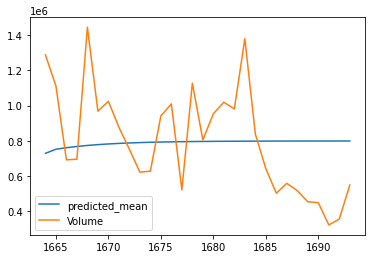

In [53]:
pred.plot(legend=True)
test['Volume'].plot(legend=True)

In [18]:
test['Volume'].mean()

801051.7

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Volume']))
print(rmse)

293592.31771563896


In [20]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1689,2022-11-22,167500.0,168000.0,165000.0,165500.0,165500.0,454542
1690,2022-11-23,166500.0,167500.0,164000.0,166000.0,166000.0,449446
1691,2022-11-24,168000.0,168500.0,166500.0,167500.0,167500.0,323362
1692,2022-11-25,168000.0,168500.0,166000.0,166000.0,166000.0,356637
1693,2022-11-28,166000.0,169500.0,164000.0,167500.0,167500.0,549252


### Future Prediction

In [21]:
index_future_dates = pd.date_range(start='2022-11-28', end='2022-12-28')
pred1 = pred
pred = model.predict(start=len(data), end=len(data)+30, typ = 'levels').rename('ARIMA predictions')
pred.index = index_future_dates
print(pred)

2022-11-28    812434.435507
2022-11-29    812432.642023
2022-11-30    812431.178033
2022-12-01    812429.983002
2022-12-02    812429.007519
2022-12-03    812428.211248
2022-12-04    812427.561266
2022-12-05    812427.030696
2022-12-06    812426.597601
2022-12-07    812426.244073
2022-12-08    812425.955494
2022-12-09    812425.719932
2022-12-10    812425.527646
2022-12-11    812425.370687
2022-12-12    812425.242564
2022-12-13    812425.137979
2022-12-14    812425.052608
2022-12-15    812424.982921
2022-12-16    812424.926037
2022-12-17    812424.879604
2022-12-18    812424.841701
2022-12-19    812424.810761
2022-12-20    812424.785506
2022-12-21    812424.764890
2022-12-22    812424.748062
2022-12-23    812424.734326
2022-12-24    812424.723113
2022-12-25    812424.713960
2022-12-26    812424.706488
2022-12-27    812424.700390
2022-12-28    812424.695411
Freq: D, Name: ARIMA predictions, dtype: float64


In [24]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [28]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [33]:
data["Date"]=lb.fit_transform(
    ["Date"])
data.dtypes

Date           int32
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [34]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,147500.0,148000.0,143500.0,144000.0,122268.195312,445332
1,1,143000.0,145000.0,142000.0,143500.0,121843.671875,530496
2,2,144000.0,145000.0,139000.0,140000.0,118871.851562,769406
3,3,138500.0,140000.0,137500.0,137500.0,116749.132812,586187
4,4,134500.0,138000.0,133500.0,136500.0,115900.062500,888701
...,...,...,...,...,...,...,...
1689,1689,167500.0,168000.0,165000.0,165500.0,165500.000000,454542
1690,1690,166500.0,167500.0,164000.0,166000.0,166000.000000,449446
1691,1691,168000.0,168500.0,166500.0,167500.0,167500.000000,323362
1692,1692,168000.0,168500.0,166000.0,166000.0,166000.000000,356637


In [41]:
#model1 = ARIMA(train['Volume'], order=(1,1,3))
#model1 = model.fit(x_train, y_train)
#model1.summary()
#pred2 = model.predict()
